# 1.爬取單月資料

 ## 1-a. 爬取鴻海公司單月「個股日本益比、殖利率及股價淨值比」資訊

In [76]:
import requests
import json
import pandas as pd

In [77]:
data = {
    'response': 'json',
    'date': '20181001',
    'stockNo':'2317',
    '_':'1540911963420'
}
res = requests.get('http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=20181001&stockNo=2317&_=1540911963420')
print(res.text)

{"stat":"OK","date":"20181001","title":"107年10月 鴻海             個股日本益比、殖利率及股價淨值比(以個股月查詢)","fields":["日期","殖利率(%)","股利年度","本益比","股價淨值比","財報年/季"],"data":[["107年10月01日","2.50",106,"10.31","1.16","107/2"],["107年10月02日","2.56",106,"10.08","1.14","107/2"],["107年10月03日","2.57",106,"10.04","1.13","107/2"],["107年10月04日","2.62",106,"9.83","1.11","107/2"],["107年10月05日","2.65",106,"9.75","1.10","107/2"],["107年10月08日","2.65",106,"9.74","1.10","107/2"],["107年10月09日","2.66",106,"9.72","1.10","107/2"],["107年10月11日","2.85",106,"9.05","1.02","107/2"],["107年10月12日","2.78",106,"9.28","1.05","107/2"],["107年10月15日","2.84",106,"9.10","1.03","107/2"],["107年10月16日","2.84",106,"9.08","1.03","107/2"],["107年10月17日","2.94",106,"8.79","0.99","107/2"],["107年10月26日","2.62",106,"9.83","1.11","107/2"],["107年10月29日","2.65",106,"9.74","1.10","107/2"],["107年10月30日","2.62",106,"9.86","1.11","107/2"],["107年10月31日","2.54",106,"10.17","1.15","107/2"]],"notes":["說明： <font color=\"#FF0000\" style=\"background-color: #FFFF00\"><b

In [78]:
jres = json.loads(res.text)
jres

{'stat': 'OK',
 'date': '20181001',
 'title': '107年10月 鴻海             個股日本益比、殖利率及股價淨值比(以個股月查詢)',
 'fields': ['日期', '殖利率(%)', '股利年度', '本益比', '股價淨值比', '財報年/季'],
 'data': [['107年10月01日', '2.50', 106, '10.31', '1.16', '107/2'],
  ['107年10月02日', '2.56', 106, '10.08', '1.14', '107/2'],
  ['107年10月03日', '2.57', 106, '10.04', '1.13', '107/2'],
  ['107年10月04日', '2.62', 106, '9.83', '1.11', '107/2'],
  ['107年10月05日', '2.65', 106, '9.75', '1.10', '107/2'],
  ['107年10月08日', '2.65', 106, '9.74', '1.10', '107/2'],
  ['107年10月09日', '2.66', 106, '9.72', '1.10', '107/2'],
  ['107年10月11日', '2.85', 106, '9.05', '1.02', '107/2'],
  ['107年10月12日', '2.78', 106, '9.28', '1.05', '107/2'],
  ['107年10月15日', '2.84', 106, '9.10', '1.03', '107/2'],
  ['107年10月16日', '2.84', 106, '9.08', '1.03', '107/2'],
  ['107年10月17日', '2.94', 106, '8.79', '0.99', '107/2'],
  ['107年10月26日', '2.62', 106, '9.83', '1.11', '107/2'],
  ['107年10月29日', '2.65', 106, '9.74', '1.10', '107/2'],
  ['107年10月30日', '2.62', 106, '9.86', '1.11', 

In [79]:
jres['stat']

'OK'

In [80]:
jres['data']

[['107年10月01日', '2.50', 106, '10.31', '1.16', '107/2'],
 ['107年10月02日', '2.56', 106, '10.08', '1.14', '107/2'],
 ['107年10月03日', '2.57', 106, '10.04', '1.13', '107/2'],
 ['107年10月04日', '2.62', 106, '9.83', '1.11', '107/2'],
 ['107年10月05日', '2.65', 106, '9.75', '1.10', '107/2'],
 ['107年10月08日', '2.65', 106, '9.74', '1.10', '107/2'],
 ['107年10月09日', '2.66', 106, '9.72', '1.10', '107/2'],
 ['107年10月11日', '2.85', 106, '9.05', '1.02', '107/2'],
 ['107年10月12日', '2.78', 106, '9.28', '1.05', '107/2'],
 ['107年10月15日', '2.84', 106, '9.10', '1.03', '107/2'],
 ['107年10月16日', '2.84', 106, '9.08', '1.03', '107/2'],
 ['107年10月17日', '2.94', 106, '8.79', '0.99', '107/2'],
 ['107年10月26日', '2.62', 106, '9.83', '1.11', '107/2'],
 ['107年10月29日', '2.65', 106, '9.74', '1.10', '107/2'],
 ['107年10月30日', '2.62', 106, '9.86', '1.11', '107/2'],
 ['107年10月31日', '2.54', 106, '10.17', '1.15', '107/2']]

In [81]:
df_temp = pd.DataFrame(jres['data'],columns=jres['fields'])
df_temp

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,107年10月01日,2.50,106,10.31,1.16,107/2
1,107年10月02日,2.56,106,10.08,1.14,107/2
2,107年10月03日,2.57,106,10.04,1.13,107/2
3,107年10月04日,2.62,106,9.83,1.11,107/2
4,107年10月05日,2.65,106,9.75,1.10,107/2
5,107年10月08日,2.65,106,9.74,1.10,107/2
6,107年10月09日,2.66,106,9.72,1.10,107/2
7,107年10月11日,2.85,106,9.05,1.02,107/2
8,107年10月12日,2.78,106,9.28,1.05,107/2
9,107年10月15日,2.84,106,9.10,1.03,107/2


 ## 1-b. 爬取鴻海公司單月「各日成交資訊」資訊

In [82]:
data = {
    'response': 'json',
    'date': '20181001',
    'stockNo':'2317',
    '_':'1540912291297'
}
res2 = requests.get('http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20181001&stockNo=2317&_=1540912291297')
print(res2.text)

{"stat":"OK","date":"20181001","title":"107年10月 2317 鴻海             各日成交資訊","fields":["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"],"data":[["107/10/01","27,677,022","2,213,853,060","79.90","80.40","79.60","79.90","+0.70","12,848"],["107/10/02","39,883,714","3,144,463,376","80.30","80.40","78.10","78.10","-1.80","15,971"],["107/10/03","29,803,905","2,315,818,630","78.10","78.20","77.60","77.80","-0.30","6,859"],["107/10/04","30,305,034","2,322,411,767","77.70","77.80","76.20","76.20","-1.60","15,126"],["107/10/05","33,643,388","2,548,528,188","76.20","76.50","75.20","75.60","-0.60","15,199"],["107/10/08","19,798,390","1,496,082,274","75.40","76.10","75.30","75.50","-0.10","9,651"],["107/10/09","21,977,940","1,662,200,828","75.70","76.00","75.30","75.30","-0.20","9,751"],["107/10/11","108,003,464","7,625,976,678","72.20","72.30","70.00","70.10","-5.20","46,731"],["107/10/12","52,966,494","3,748,639,182","70.00","72.00","69.70","71.90","+1.80","21,325"],["107/10/15","41,594,4

In [83]:
jres2 = json.loads(res2.text)
jres2

{'stat': 'OK',
 'date': '20181001',
 'title': '107年10月 2317 鴻海             各日成交資訊',
 'fields': ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'],
 'data': [['107/10/01',
   '27,677,022',
   '2,213,853,060',
   '79.90',
   '80.40',
   '79.60',
   '79.90',
   '+0.70',
   '12,848'],
  ['107/10/02',
   '39,883,714',
   '3,144,463,376',
   '80.30',
   '80.40',
   '78.10',
   '78.10',
   '-1.80',
   '15,971'],
  ['107/10/03',
   '29,803,905',
   '2,315,818,630',
   '78.10',
   '78.20',
   '77.60',
   '77.80',
   '-0.30',
   '6,859'],
  ['107/10/04',
   '30,305,034',
   '2,322,411,767',
   '77.70',
   '77.80',
   '76.20',
   '76.20',
   '-1.60',
   '15,126'],
  ['107/10/05',
   '33,643,388',
   '2,548,528,188',
   '76.20',
   '76.50',
   '75.20',
   '75.60',
   '-0.60',
   '15,199'],
  ['107/10/08',
   '19,798,390',
   '1,496,082,274',
   '75.40',
   '76.10',
   '75.30',
   '75.50',
   '-0.10',
   '9,651'],
  ['107/10/09',
   '21,977,940',
   '1,662,200,828',
   '75.70',
   '

In [84]:
jres2['stat']

'OK'

In [85]:
jres2['data']

[['107/10/01',
  '27,677,022',
  '2,213,853,060',
  '79.90',
  '80.40',
  '79.60',
  '79.90',
  '+0.70',
  '12,848'],
 ['107/10/02',
  '39,883,714',
  '3,144,463,376',
  '80.30',
  '80.40',
  '78.10',
  '78.10',
  '-1.80',
  '15,971'],
 ['107/10/03',
  '29,803,905',
  '2,315,818,630',
  '78.10',
  '78.20',
  '77.60',
  '77.80',
  '-0.30',
  '6,859'],
 ['107/10/04',
  '30,305,034',
  '2,322,411,767',
  '77.70',
  '77.80',
  '76.20',
  '76.20',
  '-1.60',
  '15,126'],
 ['107/10/05',
  '33,643,388',
  '2,548,528,188',
  '76.20',
  '76.50',
  '75.20',
  '75.60',
  '-0.60',
  '15,199'],
 ['107/10/08',
  '19,798,390',
  '1,496,082,274',
  '75.40',
  '76.10',
  '75.30',
  '75.50',
  '-0.10',
  '9,651'],
 ['107/10/09',
  '21,977,940',
  '1,662,200,828',
  '75.70',
  '76.00',
  '75.30',
  '75.30',
  '-0.20',
  '9,751'],
 ['107/10/11',
  '108,003,464',
  '7,625,976,678',
  '72.20',
  '72.30',
  '70.00',
  '70.10',
  '-5.20',
  '46,731'],
 ['107/10/12',
  '52,966,494',
  '3,748,639,182',
  '70.00

In [86]:
df_temp2 = pd.DataFrame(jres2['data'],columns=jres2['fields'])
df_temp2

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/02,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
2,107/10/03,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
3,107/10/04,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
4,107/10/05,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"
5,107/10/08,"19,798,390","1,496,082,274",75.40,76.10,75.30,75.50,-0.10,"9,651"
6,107/10/09,"21,977,940","1,662,200,828",75.70,76.00,75.30,75.30,-0.20,"9,751"
7,107/10/11,"108,003,464","7,625,976,678",72.20,72.30,70.00,70.10,-5.20,"46,731"
8,107/10/12,"52,966,494","3,748,639,182",70.00,72.00,69.70,71.90,+1.80,"21,325"
9,107/10/15,"41,594,483","2,940,268,543",71.20,71.20,70.20,70.50,-1.40,"18,490"


## 1-c. 合併兩張表：單月「個股日本益比、殖利率及股價淨值比」資訊 ＋ 單月「各日成交資訊」資訊

In [87]:
#先預處理df_temp的資料格式
df_temp['日期'] = df_temp['日期'].str.split("年").str.get(0)+"/"+ \
df_temp['日期'].str.split("年").str.get(1).str.split("月").str.get(0)+"/"+ \
df_temp['日期'].str.split("年").str.get(1).str.split("月").str.get(1).str.split("日").str.get(0)

In [88]:
#格式已改變
df_temp['日期']

0     107/10/01
1     107/10/02
2     107/10/03
3     107/10/04
4     107/10/05
5     107/10/08
6     107/10/09
7     107/10/11
8     107/10/12
9     107/10/15
10    107/10/16
11    107/10/17
12    107/10/26
13    107/10/29
14    107/10/30
15    107/10/31
Name: 日期, dtype: object

In [89]:
#Left join兩筆資料
df_temp_final = pd.merge(df_temp,df_temp2, left_on='日期', right_on='日期', how='left')
df_temp_final

#最終大表呈現的模樣

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/02,2.56,106,10.08,1.14,107/2,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
2,107/10/03,2.57,106,10.04,1.13,107/2,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
3,107/10/04,2.62,106,9.83,1.11,107/2,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
4,107/10/05,2.65,106,9.75,1.10,107/2,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"
5,107/10/08,2.65,106,9.74,1.10,107/2,"19,798,390","1,496,082,274",75.40,76.10,75.30,75.50,-0.10,"9,651"
6,107/10/09,2.66,106,9.72,1.10,107/2,"21,977,940","1,662,200,828",75.70,76.00,75.30,75.30,-0.20,"9,751"
7,107/10/11,2.85,106,9.05,1.02,107/2,"108,003,464","7,625,976,678",72.20,72.30,70.00,70.10,-5.20,"46,731"
8,107/10/12,2.78,106,9.28,1.05,107/2,"52,966,494","3,748,639,182",70.00,72.00,69.70,71.90,+1.80,"21,325"
9,107/10/15,2.84,106,9.10,1.03,107/2,"41,594,483","2,940,268,543",71.20,71.20,70.20,70.50,-1.40,"18,490"


# 2.爬取多月資訊

In [90]:
import datetime
import calendar
import time

time = datetime.date(2018, 10, 1) 

#求前一個月的第一天
first_day = datetime.date(time.year, time.month, 1)
pre_month = first_day - datetime.timedelta(days = 1) 
first_day_of_pre_month = datetime.date(pre_month.year, pre_month.month, 1)
first_day_of_pre_month

datetime.date(2018, 9, 1)

In [91]:
#製作爬蟲回傳存取目標Dataframe
column_list = list(df_temp.columns)
df = pd.DataFrame(columns=column_list)
df

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季


In [92]:
from datetime import datetime
from datetime import timedelta
import time

#開始爬蟲
crawl_date = datetime(2018,11,30) # start_date
df = df_temp

#第一份資料：單月「個股日本益比、殖利率及股價淨值比」資訊
for i in range(18):
    crawl_date -= timedelta(29)
    first_day = datetime(crawl_date.year, crawl_date.month, 1)
    pre_month = first_day - timedelta(days = 1) 
    first_day_of_pre_month = datetime(pre_month.year, pre_month.month, 1)
    crawl_date_str = datetime.strftime(first_day_of_pre_month, '%Y%m%d')
    
    res = requests.get('http://www.twse.com.tw/exchangeReport/BWIBBU?response=json&date=' + crawl_date_str + '&stockNo=2317&_=1540911963420')
    jres = json.loads(res.text)
    
    # 證交所回覆有資料
    if(jres['stat']=='OK'):
        print(crawl_date_str, ': crawling data...')
        
        # 將讀取回的json轉成的DataFrame(df_temp)
        df_temp = pd.DataFrame(jres['data'],columns=jres['fields'])
        
        # 更改df_temp的日期資料格式
        df_temp['日期'] = df_temp['日期'].str.split("年").str.get(0)+"/"+ \
        df_temp['日期'].str.split("年").str.get(1).str.split("月").str.get(0)+"/"+ \
        df_temp['日期'].str.split("年").str.get(1).str.split("月").str.get(1).str.split("日").str.get(0)
        
        # 欄位合併
        df = df.append(df_temp)
        
    else:
        print(crawl_date_str, ': no data')
        
    # 讓程式睡個10秒再繼續爬取下一天資料，避免頻繁抓取被台灣證券交易所封鎖IP拒絕存取
    time.sleep(10) 

20181001 : crawling data...
20180901 : crawling data...
20180801 : crawling data...
20180701 : crawling data...
20180601 : crawling data...
20180501 : crawling data...
20180401 : crawling data...
20180301 : crawling data...
20180201 : crawling data...
20180101 : crawling data...
20171201 : crawling data...
20171101 : crawling data...
20171001 : crawling data...
20170901 : crawling data...
20170801 : crawling data...
20170701 : crawling data...
20170601 : crawling data...
20170501 : crawling data...


In [93]:
#製作爬蟲回傳存取目標Dataframe
column_list = list(df_temp2.columns)
df2 = pd.DataFrame(columns=column_list)
df2

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數


In [97]:
from datetime import datetime
import time 

#開始爬蟲
crawl_date = datetime(2018,11,30) # start_date
df2 = df_temp2

#第二份資料：單月「各日成交資訊」資訊
for i in range(18):
    crawl_date -= timedelta(29)
    first_day = datetime(crawl_date.year, crawl_date.month, 1)
    pre_month = first_day - timedelta(days = 1) 
    first_day_of_pre_month = datetime(pre_month.year, pre_month.month, 1)
    crawl_date_str = datetime.strftime(first_day_of_pre_month, '%Y%m%d')
    
    res2 = requests.get('http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=' + crawl_date_str + '&stockNo=2317&_=1540912291297')
    jres2 = json.loads(res2.text)

    # 證交所回覆有資料
    if(jres2['stat']=='OK'):
        print(crawl_date_str, ': crawling data...')
        
        # 將讀取回的json轉成的DataFrame(df_temp)
        df_temp2 = pd.DataFrame(jres2['data'],columns=jres2['fields'])
                
        # 欄位合併
        df2 = df2.append(df_temp2)
        
    else:
        print(crawl_date_str, ': no data')
        
    # 讓程式睡個15秒再繼續爬取下一天資料，避免頻繁抓取被台灣證券交易所封鎖IP拒絕存取
    time.sleep(15)

20181001 : crawling data...
20180901 : crawling data...
20180801 : crawling data...
20180701 : crawling data...
20180601 : crawling data...
20180501 : crawling data...
20180401 : crawling data...
20180301 : crawling data...
20180201 : crawling data...
20180101 : crawling data...
20171201 : crawling data...
20171101 : crawling data...
20171001 : crawling data...
20170901 : crawling data...
20170801 : crawling data...
20170701 : crawling data...
20170601 : crawling data...
20170501 : crawling data...


In [98]:
# 整合這兩張表
df_all = pd.merge(df,df2, left_on='日期', right_on='日期', how='left')
pd.set_option('display.max.columns',30)
pd.set_option('display.max.rows',300)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/01,2.50,106,10.31,1.16,107/2,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
2,107/10/02,2.56,106,10.08,1.14,107/2,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
3,107/10/02,2.56,106,10.08,1.14,107/2,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
4,107/10/03,2.57,106,10.04,1.13,107/2,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
5,107/10/03,2.57,106,10.04,1.13,107/2,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
6,107/10/04,2.62,106,9.83,1.11,107/2,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
7,107/10/04,2.62,106,9.83,1.11,107/2,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
8,107/10/05,2.65,106,9.75,1.10,107/2,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"
9,107/10/05,2.65,106,9.75,1.10,107/2,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"


# 3.資料預處理

In [99]:
# X0.00的部分應該直接換成0
df_all = df_all.replace('X0.00',0)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/01,2.50,106,10.31,1.16,107/2,"27,677,022","2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
2,107/10/02,2.56,106,10.08,1.14,107/2,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
3,107/10/02,2.56,106,10.08,1.14,107/2,"39,883,714","3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
4,107/10/03,2.57,106,10.04,1.13,107/2,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
5,107/10/03,2.57,106,10.04,1.13,107/2,"29,803,905","2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
6,107/10/04,2.62,106,9.83,1.11,107/2,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
7,107/10/04,2.62,106,9.83,1.11,107/2,"30,305,034","2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
8,107/10/05,2.65,106,9.75,1.10,107/2,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"
9,107/10/05,2.65,106,9.75,1.10,107/2,"33,643,388","2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"


In [100]:
df_all["成交股數"] = df_all["成交股數"].str.split(",").str.get(0)+df_all["成交股數"].str.split(",").str.get(1)+ \
df_all["成交股數"].str.split(",").str.get(2)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,27677022,"2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/01,2.50,106,10.31,1.16,107/2,27677022,"2,213,853,060",79.90,80.40,79.60,79.90,+0.70,"12,848"
2,107/10/02,2.56,106,10.08,1.14,107/2,39883714,"3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
3,107/10/02,2.56,106,10.08,1.14,107/2,39883714,"3,144,463,376",80.30,80.40,78.10,78.10,-1.80,"15,971"
4,107/10/03,2.57,106,10.04,1.13,107/2,29803905,"2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
5,107/10/03,2.57,106,10.04,1.13,107/2,29803905,"2,315,818,630",78.10,78.20,77.60,77.80,-0.30,"6,859"
6,107/10/04,2.62,106,9.83,1.11,107/2,30305034,"2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
7,107/10/04,2.62,106,9.83,1.11,107/2,30305034,"2,322,411,767",77.70,77.80,76.20,76.20,-1.60,"15,126"
8,107/10/05,2.65,106,9.75,1.10,107/2,33643388,"2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"
9,107/10/05,2.65,106,9.75,1.10,107/2,33643388,"2,548,528,188",76.20,76.50,75.20,75.60,-0.60,"15,199"


In [101]:
df_all["成交金額"] = df_all["成交金額"].str.split(",").str.get(0)+df_all["成交金額"].str.split(",").str.get(1)+ \
df_all["成交金額"].str.split(",").str.get(2)+df_all["成交金額"].str.split(",").str.get(3)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,27677022,2213853060,79.90,80.40,79.60,79.90,+0.70,"12,848"
1,107/10/01,2.50,106,10.31,1.16,107/2,27677022,2213853060,79.90,80.40,79.60,79.90,+0.70,"12,848"
2,107/10/02,2.56,106,10.08,1.14,107/2,39883714,3144463376,80.30,80.40,78.10,78.10,-1.80,"15,971"
3,107/10/02,2.56,106,10.08,1.14,107/2,39883714,3144463376,80.30,80.40,78.10,78.10,-1.80,"15,971"
4,107/10/03,2.57,106,10.04,1.13,107/2,29803905,2315818630,78.10,78.20,77.60,77.80,-0.30,"6,859"
5,107/10/03,2.57,106,10.04,1.13,107/2,29803905,2315818630,78.10,78.20,77.60,77.80,-0.30,"6,859"
6,107/10/04,2.62,106,9.83,1.11,107/2,30305034,2322411767,77.70,77.80,76.20,76.20,-1.60,"15,126"
7,107/10/04,2.62,106,9.83,1.11,107/2,30305034,2322411767,77.70,77.80,76.20,76.20,-1.60,"15,126"
8,107/10/05,2.65,106,9.75,1.10,107/2,33643388,2548528188,76.20,76.50,75.20,75.60,-0.60,"15,199"
9,107/10/05,2.65,106,9.75,1.10,107/2,33643388,2548528188,76.20,76.50,75.20,75.60,-0.60,"15,199"


In [102]:
df_all["成交筆數"] = df_all["成交筆數"].str.split(",").str.get(0)+df_all["成交筆數"].str.split(",").str.get(1)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,27677022,2213853060,79.90,80.40,79.60,79.90,+0.70,12848
1,107/10/01,2.50,106,10.31,1.16,107/2,27677022,2213853060,79.90,80.40,79.60,79.90,+0.70,12848
2,107/10/02,2.56,106,10.08,1.14,107/2,39883714,3144463376,80.30,80.40,78.10,78.10,-1.80,15971
3,107/10/02,2.56,106,10.08,1.14,107/2,39883714,3144463376,80.30,80.40,78.10,78.10,-1.80,15971
4,107/10/03,2.57,106,10.04,1.13,107/2,29803905,2315818630,78.10,78.20,77.60,77.80,-0.30,6859
5,107/10/03,2.57,106,10.04,1.13,107/2,29803905,2315818630,78.10,78.20,77.60,77.80,-0.30,6859
6,107/10/04,2.62,106,9.83,1.11,107/2,30305034,2322411767,77.70,77.80,76.20,76.20,-1.60,15126
7,107/10/04,2.62,106,9.83,1.11,107/2,30305034,2322411767,77.70,77.80,76.20,76.20,-1.60,15126
8,107/10/05,2.65,106,9.75,1.10,107/2,33643388,2548528188,76.20,76.50,75.20,75.60,-0.60,15199
9,107/10/05,2.65,106,9.75,1.10,107/2,33643388,2548528188,76.20,76.50,75.20,75.60,-0.60,15199


In [103]:
# 重複的日期刪除
df_all = df_all.drop_duplicates(subset=None, keep='first', inplace=False)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/10/01,2.50,106,10.31,1.16,107/2,27677022,2213853060,79.90,80.40,79.60,79.90,+0.70,12848
2,107/10/02,2.56,106,10.08,1.14,107/2,39883714,3144463376,80.30,80.40,78.10,78.10,-1.80,15971
4,107/10/03,2.57,106,10.04,1.13,107/2,29803905,2315818630,78.10,78.20,77.60,77.80,-0.30,6859
6,107/10/04,2.62,106,9.83,1.11,107/2,30305034,2322411767,77.70,77.80,76.20,76.20,-1.60,15126
8,107/10/05,2.65,106,9.75,1.10,107/2,33643388,2548528188,76.20,76.50,75.20,75.60,-0.60,15199
10,107/10/08,2.65,106,9.74,1.10,107/2,19798390,1496082274,75.40,76.10,75.30,75.50,-0.10,9651
12,107/10/09,2.66,106,9.72,1.10,107/2,21977940,1662200828,75.70,76.00,75.30,75.30,-0.20,9751
14,107/10/11,2.85,106,9.05,1.02,107/2,108003464,7625976678,72.20,72.30,70.00,70.10,-5.20,46731
16,107/10/12,2.78,106,9.28,1.05,107/2,52966494,3748639182,70.00,72.00,69.70,71.90,+1.80,21325
18,107/10/15,2.84,106,9.10,1.03,107/2,41594483,2940268543,71.20,71.20,70.20,70.50,-1.40,18490


In [104]:
df_all['日期'].size

369

In [105]:
#依照日期時間升冪排列
df_all = df_all.sort_values("日期")
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
397,106/05/02,5.00,104,11.66,1.61,105/4,146011742,14600738067,99.80,100.50,99.80,100.00,+1.20,25883
398,106/05/03,4.98,104,11.71,1.61,105/4,43599757,4389370200,100.00,101.50,100.00,100.50,+0.50,20474
399,106/05/04,4.98,104,11.71,1.61,105/4,27758737,2793177700,100.50,101.00,100.00,100.50,0.00,15032
400,106/05/05,5.00,104,11.66,1.61,105/4,22247391,2231793100,100.00,101.00,100.00,100.00,-0.50,11274
401,106/05/08,4.95,104,11.77,1.62,105/4,23208376,2337152395,101.00,101.50,100.00,101.00,+1.00,10786
402,106/05/09,4.81,104,12.12,1.67,105/4,106299570,11089336210,102.00,105.50,101.50,104.00,+3.00,41750
403,106/05/10,4.81,104,12.12,1.67,105/4,44982960,4687034453,105.50,105.50,103.00,104.00,0.00,22963
404,106/05/11,4.81,104,12.12,1.67,105/4,39791573,4119466505,104.00,104.00,103.00,104.00,0.00,17492
405,106/05/12,4.39,105,11.95,1.65,105/4,59017991,6092376734,104.00,105.00,102.00,102.50,-1.50,24904
406,106/05/15,4.33,105,12.08,1.62,106/1,33740219,3496582918,103.00,104.50,102.50,104.00,+1.50,14604


In [106]:
#重設index
df_all = df_all.reset_index(drop=True)
pd.set_option('display.max.columns',30)
pd.set_option('display.max.rows',400)
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/05/02,5.00,104,11.66,1.61,105/4,146011742,14600738067,99.80,100.50,99.80,100.00,+1.20,25883
1,106/05/03,4.98,104,11.71,1.61,105/4,43599757,4389370200,100.00,101.50,100.00,100.50,+0.50,20474
2,106/05/04,4.98,104,11.71,1.61,105/4,27758737,2793177700,100.50,101.00,100.00,100.50,0.00,15032
3,106/05/05,5.00,104,11.66,1.61,105/4,22247391,2231793100,100.00,101.00,100.00,100.00,-0.50,11274
4,106/05/08,4.95,104,11.77,1.62,105/4,23208376,2337152395,101.00,101.50,100.00,101.00,+1.00,10786
5,106/05/09,4.81,104,12.12,1.67,105/4,106299570,11089336210,102.00,105.50,101.50,104.00,+3.00,41750
6,106/05/10,4.81,104,12.12,1.67,105/4,44982960,4687034453,105.50,105.50,103.00,104.00,0.00,22963
7,106/05/11,4.81,104,12.12,1.67,105/4,39791573,4119466505,104.00,104.00,103.00,104.00,0.00,17492
8,106/05/12,4.39,105,11.95,1.65,105/4,59017991,6092376734,104.00,105.00,102.00,102.50,-1.50,24904
9,106/05/15,4.33,105,12.08,1.62,106/1,33740219,3496582918,103.00,104.50,102.50,104.00,+1.50,14604


In [107]:
for i in range(len(df_all)):
    df_all.loc[i,'日期'] = str(int(df_all.loc[i,'日期'][:3])+1911) + df_all.loc[i,'日期'][3:]

In [109]:
#檢查日期格式已改為西元年
df_all

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2017/05/02,5.00,104,11.66,1.61,105/4,146011742,14600738067,99.80,100.50,99.80,100.00,+1.20,25883
1,2017/05/03,4.98,104,11.71,1.61,105/4,43599757,4389370200,100.00,101.50,100.00,100.50,+0.50,20474
2,2017/05/04,4.98,104,11.71,1.61,105/4,27758737,2793177700,100.50,101.00,100.00,100.50,0.00,15032
3,2017/05/05,5.00,104,11.66,1.61,105/4,22247391,2231793100,100.00,101.00,100.00,100.00,-0.50,11274
4,2017/05/08,4.95,104,11.77,1.62,105/4,23208376,2337152395,101.00,101.50,100.00,101.00,+1.00,10786
5,2017/05/09,4.81,104,12.12,1.67,105/4,106299570,11089336210,102.00,105.50,101.50,104.00,+3.00,41750
6,2017/05/10,4.81,104,12.12,1.67,105/4,44982960,4687034453,105.50,105.50,103.00,104.00,0.00,22963
7,2017/05/11,4.81,104,12.12,1.67,105/4,39791573,4119466505,104.00,104.00,103.00,104.00,0.00,17492
8,2017/05/12,4.39,105,11.95,1.65,105/4,59017991,6092376734,104.00,105.00,102.00,102.50,-1.50,24904
9,2017/05/15,4.33,105,12.08,1.62,106/1,33740219,3496582918,103.00,104.50,102.50,104.00,+1.50,14604


In [110]:
del df_all["股利年度"]

In [111]:
del df_all["財報年/季"]

In [116]:
df_all["日期"] = df_all["日期"].str.split("/").str.get(0)+df_all["日期"].str.split("/").str.get(1)+ \
df_all["日期"].str.split("/").str.get(2)
df_all

,日期,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,,,,,
2017/05/02,20170502,5.00,11.66,1.61,146011742,14600738067,99.80,100.50,99.80,100.00,+1.20,25883
2017/05/03,20170503,4.98,11.71,1.61,43599757,4389370200,100.00,101.50,100.00,100.50,+0.50,20474
2017/05/04,20170504,4.98,11.71,1.61,27758737,2793177700,100.50,101.00,100.00,100.50,0.00,15032
2017/05/05,20170505,5.00,11.66,1.61,22247391,2231793100,100.00,101.00,100.00,100.00,-0.50,11274
2017/05/08,20170508,4.95,11.77,1.62,23208376,2337152395,101.00,101.50,100.00,101.00,+1.00,10786
2017/05/09,20170509,4.81,12.12,1.67,106299570,11089336210,102.00,105.50,101.50,104.00,+3.00,41750
2017/05/10,20170510,4.81,12.12,1.67,44982960,4687034453,105.50,105.50,103.00,104.00,0.00,22963
2017/05/11,20170511,4.81,12.12,1.67,39791573,4119466505,104.00,104.00,103.00,104.00,0.00,17492
2017/05/12,20170512,4.39,11.95,1.65,59017991,6092376734,104.00,105.00,102.00,102.50,-1.50,24904


In [117]:
df_all = df_all.set_index(df_all['日期'], drop=True)
df_all.head()

,日期,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,,,,,
20170502,20170502,5.00,11.66,1.61,146011742,14600738067,99.80,100.50,99.80,100.00,+1.20,25883
20170503,20170503,4.98,11.71,1.61,43599757,4389370200,100.00,101.50,100.00,100.50,+0.50,20474
20170504,20170504,4.98,11.71,1.61,27758737,2793177700,100.50,101.00,100.00,100.50,0.00,15032
20170505,20170505,5.00,11.66,1.61,22247391,2231793100,100.00,101.00,100.00,100.00,-0.50,11274
20170508,20170508,4.95,11.77,1.62,23208376,2337152395,101.00,101.50,100.00,101.00,+1.00,10786


In [118]:
type(df.index)

pandas.core.indexes.numeric.Int64Index

In [119]:
#轉成DatetimeTndex
df_all.index = pd.to_datetime(df_all.index,format='%Y%m%d')
type(df_all.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [121]:
del df_all["日期"]

In [122]:
df_all.dtypes

殖利率(%)    object
本益比       object
股價淨值比     object
成交股數      object
成交金額      object
開盤價       object
最高價       object
最低價       object
收盤價       object
漲跌價差      object
成交筆數      object
dtype: object

In [123]:
df_all["殖利率(%)"] = df_all["殖利率(%)"].astype(float)
df_all["本益比"] = df_all["本益比"].astype(float)
df_all["股價淨值比"] = df_all["股價淨值比"].astype(float)
df_all["成交股數"] = df_all["成交股數"].astype(int)
df_all["成交金額"] = df_all["成交金額"].astype(float)
df_all["開盤價"] = df_all["開盤價"].astype(float)
df_all["最高價"] = df_all["最高價"].astype(float)
df_all["最低價"] = df_all["最低價"].astype(float)
df_all["收盤價"] = df_all["收盤價"].astype(float)
df_all["漲跌價差"] = df_all["漲跌價差"].astype(float)
df_all["成交筆數"] = df_all["成交筆數"].astype(float)

df_all.dtypes

殖利率(%)    float64
本益比       float64
股價淨值比     float64
成交股數        int64
成交金額      float64
開盤價       float64
最高價       float64
最低價       float64
收盤價       float64
漲跌價差      float64
成交筆數      float64
dtype: object

# 4.視覺化

In [124]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei' #顯示中文('SimHei' for MacOS)
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.style.use('ggplot')
#圖片顯示於Jupyter Notebook上
%matplotlib inline

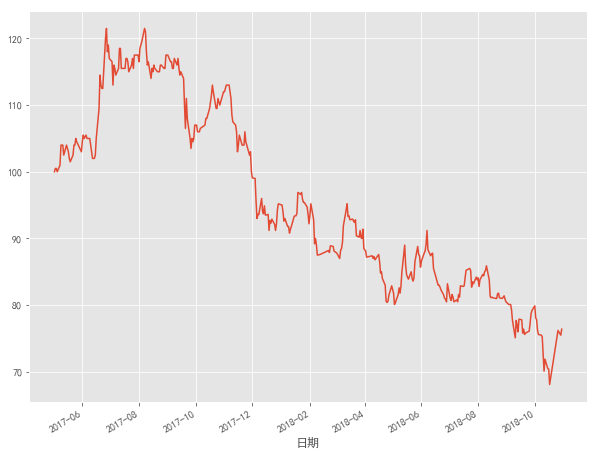

In [211]:
df_all['收盤價'].plot(figsize=(10,8))

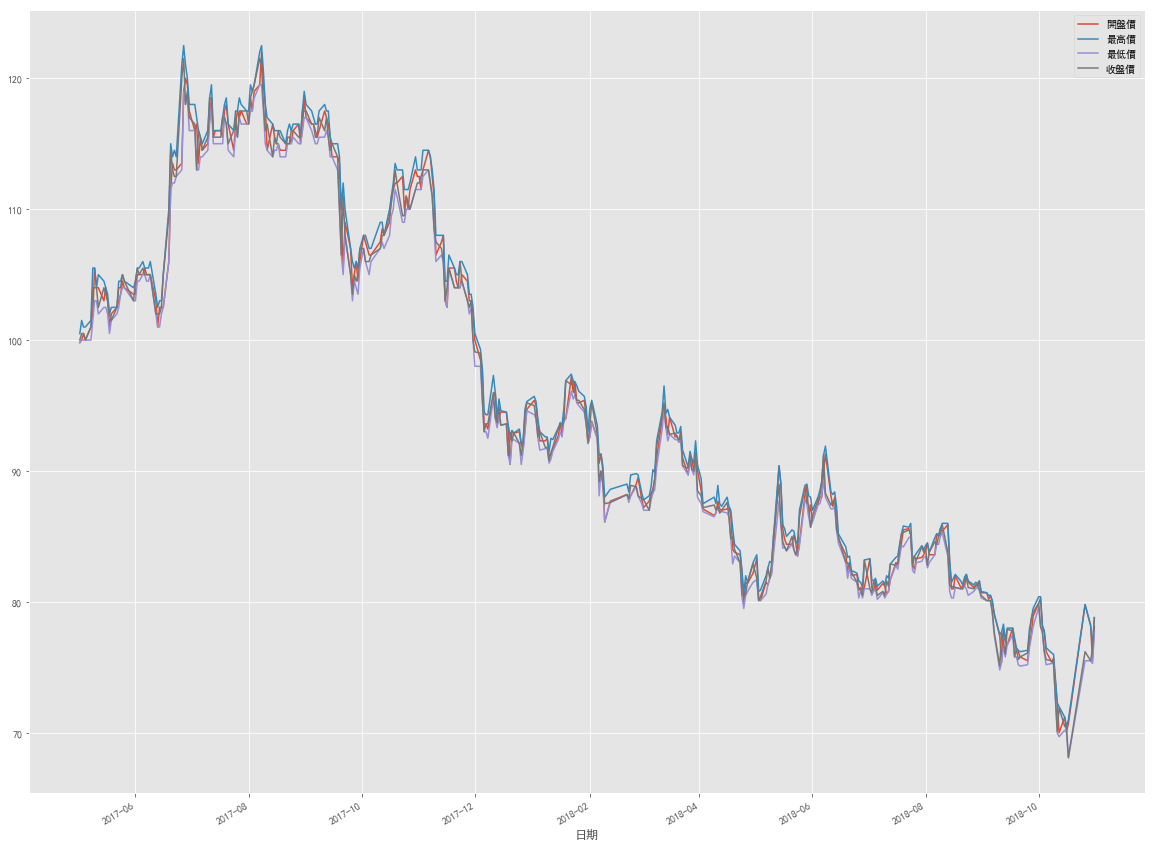

In [126]:
df_all.loc[:,"開盤價":"收盤價"].plot(figsize=(20,16))

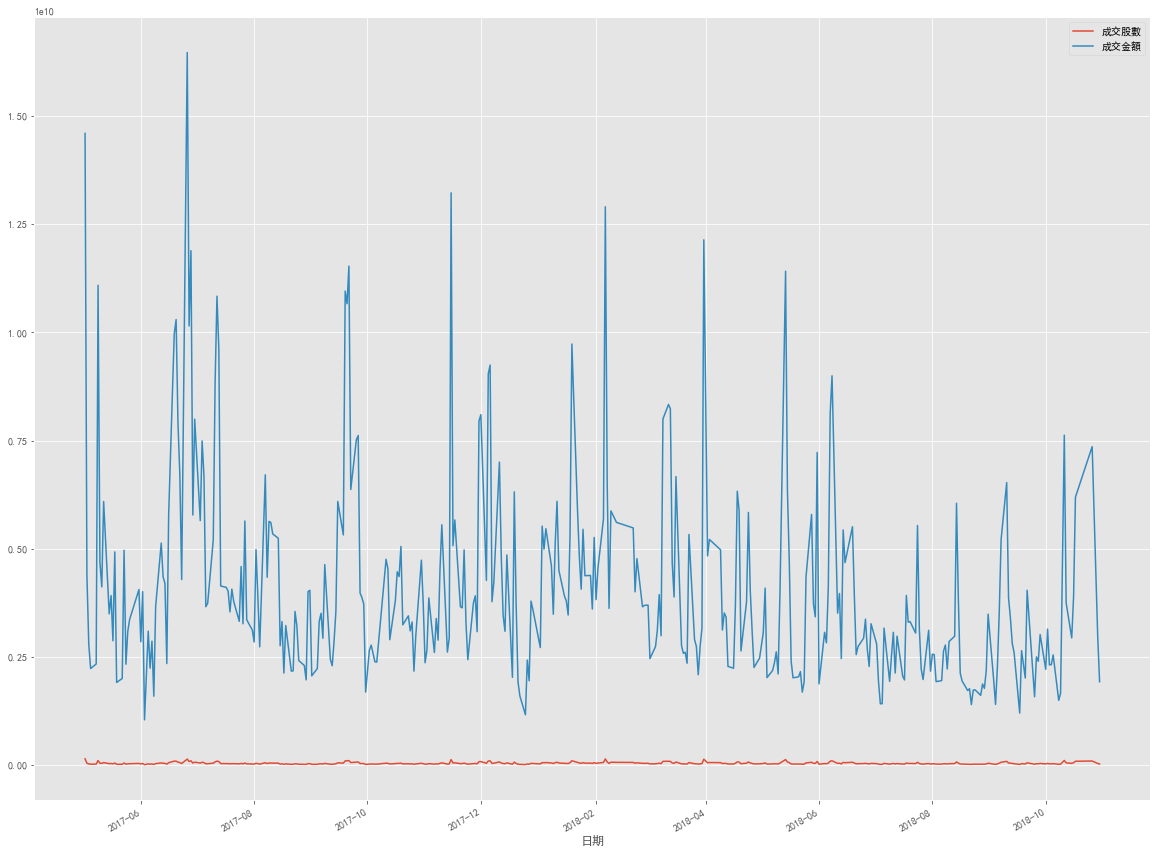

In [158]:
df_all.loc[:,"成交股數":"成交金額"].plot(figsize=(20,16))

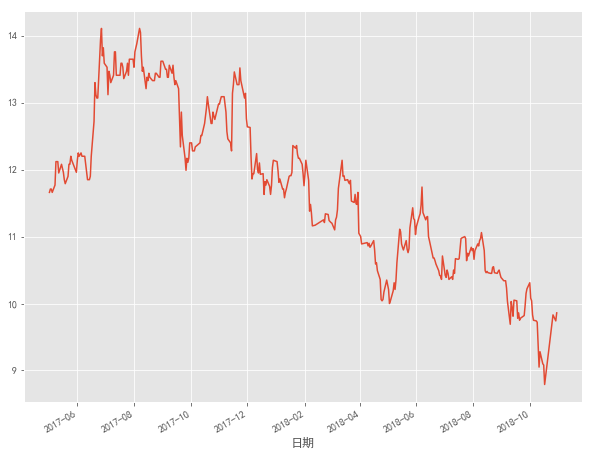

In [210]:
df_all['本益比'].plot(figsize=(10,8))

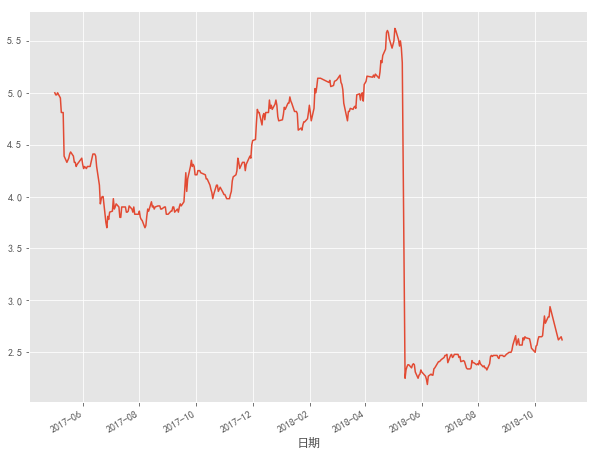

In [212]:
df_all['殖利率(%)'].plot(figsize=(10,8))

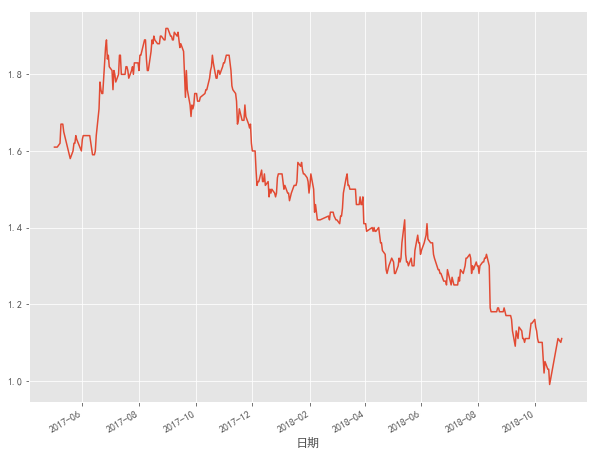

In [213]:
df_all['股價淨值比'].plot(figsize=(10,8))

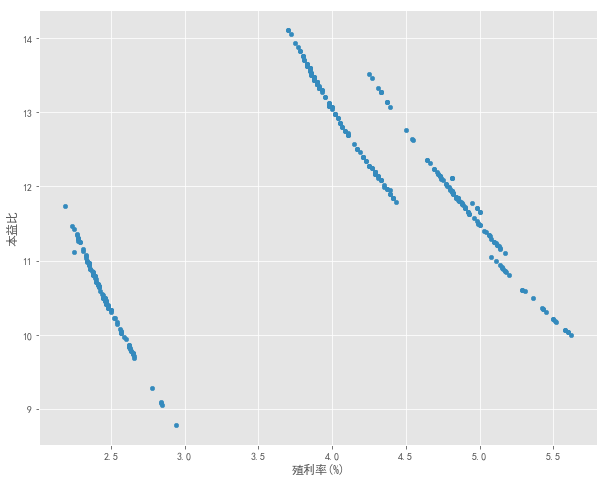

In [128]:
df_all.plot(kind='scatter',x='殖利率(%)', y='本益比',figsize=(10,8))

# 5.分析

## 相關分析

In [129]:
df_all.loc[:,"殖利率(%)":"成交筆數"].corr()

,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
殖利率(%),1.000000,0.349766,0.435494,0.135748,0.199848,0.338726,0.340619,0.343882,0.340232,-0.024125,0.164892
本益比,0.349766,1.000000,0.968109,0.046766,0.281302,0.965919,0.968750,0.969946,0.970925,0.109080,-0.006197
股價淨值比,0.435494,0.968109,1.000000,0.024769,0.257110,0.982651,0.984390,0.985040,0.985051,0.088998,-0.023971
成交股數,0.135748,0.046766,0.024769,1.000000,0.961583,0.017648,0.037239,0.001748,0.016485,-0.070769,0.939309
成交金額,0.199848,0.281302,0.257110,0.961583,1.000000,0.254771,0.276323,0.241455,0.257324,-0.015061,0.881327
開盤價,0.338726,0.965919,0.982651,0.017648,0.254771,1.000000,0.998424,0.998492,0.996359,0.036559,-0.033724
最高價,0.340619,0.968750,0.984390,0.037239,0.276323,0.998424,1.000000,0.998229,0.998473,0.068558,-0.016654
最低價,0.343882,0.969946,0.985040,0.001748,0.241455,0.998492,0.998229,1.000000,0.998521,0.066727,-0.052219
收盤價,0.340232,0.970925,0.985051,0.016485,0.257324,0.996359,0.998473,0.998521,1.000000,0.103355,-0.038529
漲跌價差,-0.024125,0.109080,0.088998,-0.070769,-0.015061,0.036559,0.068558,0.066727,0.103355,1.000000,-0.128287


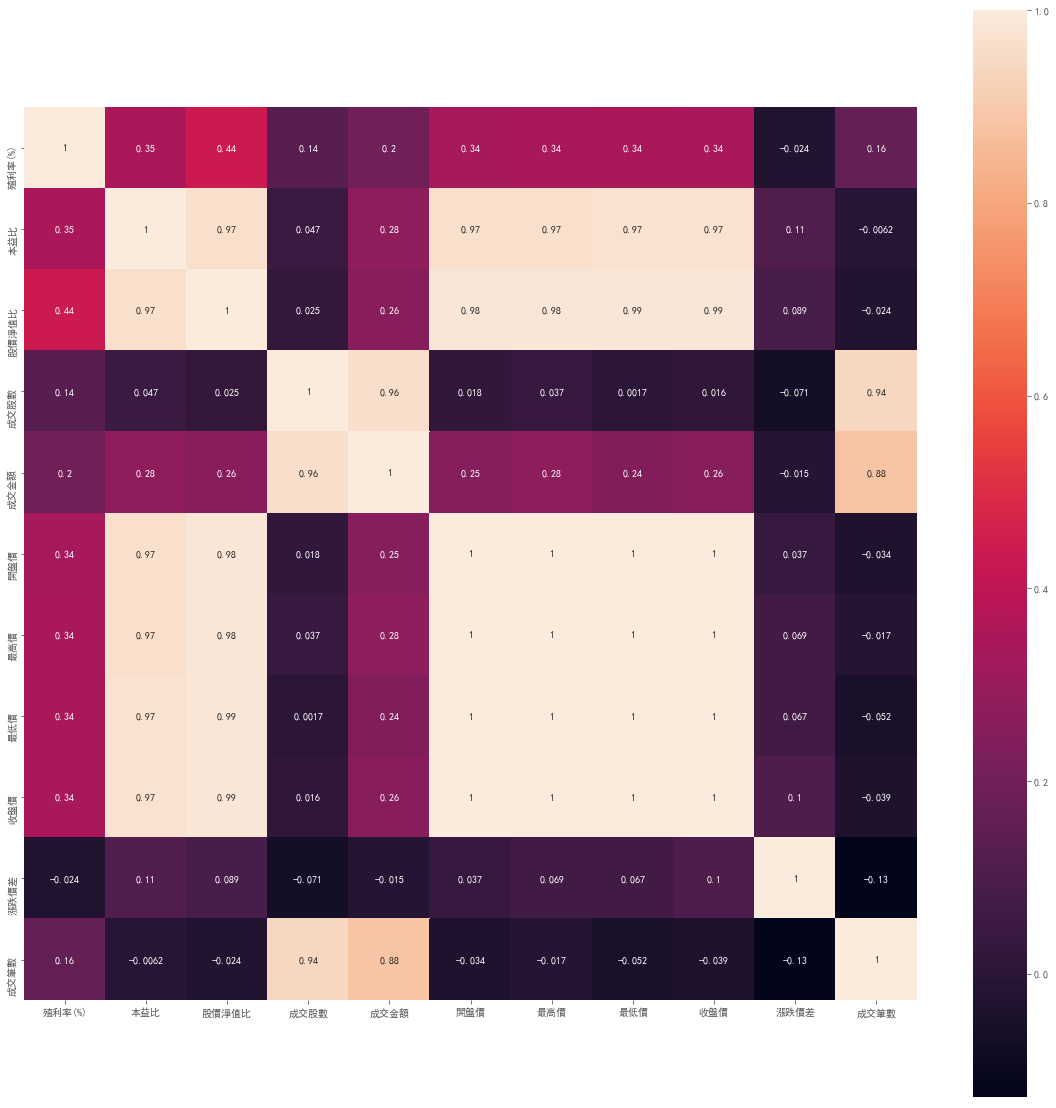

In [130]:
import seaborn as sns
corr = df_all.loc[:,"殖利率(%)":"成交筆數"].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, square=True, annot=True)
plt.show()

## 統計分析

In [131]:
#統計分析

df_all_stock = df_all.loc[:,"殖利率(%)":"成交筆數"]
df_all_stock.describe()

,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
count,369.000000,369.000000,369.000000,3.690000e+02,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,3.854146,11.753333,1.513604,4.262782e+07,4.091872e+09,95.903794,96.646070,95.143631,95.778049,-0.061247,17654.493225
std,1.028296,1.206284,0.245056,2.292369e+07,2.329704e+09,13.564411,13.750514,13.475639,13.644543,1.442631,10208.597735
min,2.190000,8.790000,0.990000,9.968286e+06,1.046426e+09,70.000000,70.500000,68.100000,68.100000,-5.200000,4168.000000
25%,2.570000,10.790000,1.310000,2.761207e+07,2.553597e+09,83.800000,84.400000,83.500000,84.000000,-0.800000,10939.000000
50%,4.020000,11.820000,1.510000,3.687726e+07,3.508485e+09,93.000000,93.500000,92.500000,93.000000,0.000000,14604.000000
75%,4.800000,12.750000,1.750000,4.983607e+07,4.857630e+09,107.500000,108.000000,106.000000,107.000000,0.800000,20474.000000
max,5.620000,14.110000,1.920000,1.460117e+08,1.646916e+10,122.000000,122.500000,119.500000,121.500000,7.500000,80522.000000


In [132]:
df_all_stock.mean()

殖利率(%)    3.854146e+00
本益比       1.175333e+01
股價淨值比     1.513604e+00
成交股數      4.262782e+07
成交金額      4.091872e+09
開盤價       9.590379e+01
最高價       9.664607e+01
最低價       9.514363e+01
收盤價       9.577805e+01
漲跌價差     -6.124661e-02
成交筆數      1.765449e+04
dtype: float64

# 6.機器學習模型預估

### 股票殖利率＝現金股利 / 股價 (越高越好)
### 本益比(PER) = 每股市價 / 每股盈餘(EPS) （越低越好）
### 股價淨值比(PBR) = 股票市值 / 每股淨值 （股價淨值比小於1時，代表現在比較便宜；股價淨值比大於1時，代表現在比較昂貴）

In [133]:
X = df_all[['殖利率(%)','本益比','股價淨值比']]

## Kmeans分群

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [135]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X_std)

Text(0,0.5,'本益比')

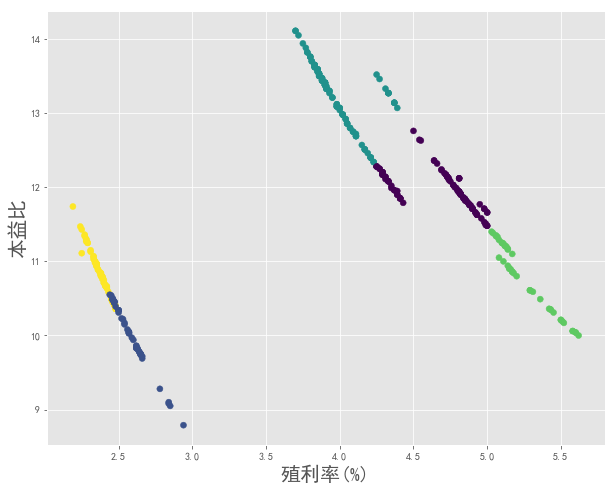

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='SimHei' #顯示中文('SimHei' for MacOS)

plt.figure(figsize=(10,8))
plt.scatter(X['殖利率(%)'],X['本益比'],c=y_pred)
plt.xlabel('殖利率(%)', fontsize=20)
plt.ylabel('本益比', fontsize=20)

Text(0.5,0,'本益比')

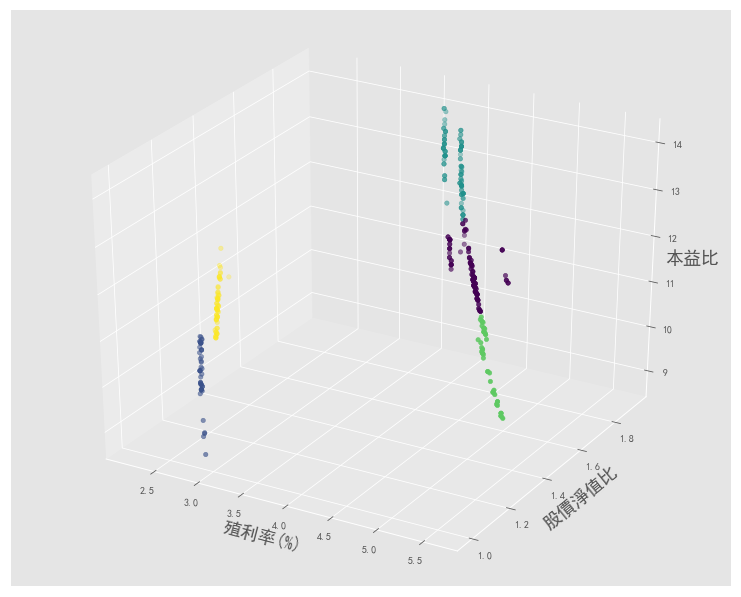

In [137]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(xs=X['殖利率(%)'],ys=X['股價淨值比'],zs=X['本益比'],c=y_pred)
ax.set_xlabel('殖利率(%)',fontsize=18)
ax.set_ylabel('股價淨值比',fontsize=18)
ax.set_zlabel('本益比',fontsize=18)

## 製作明日收盤價

In [138]:
#製作明日收盤價
date_list = list(df_all.index)
for i in range(len(df_all)-1):
    df_all.loc[date_list[i],'明日收盤價'] = df_all.loc[date_list[i+1], '收盤價']
df_all

,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,明日收盤價
日期,,,,,,,,,,,,
2017-05-02,5.00,11.66,1.61,146011742,1.460074e+10,99.8,100.5,99.8,100.0,1.2,25883.0,100.5
2017-05-03,4.98,11.71,1.61,43599757,4.389370e+09,100.0,101.5,100.0,100.5,0.5,20474.0,100.5
2017-05-04,4.98,11.71,1.61,27758737,2.793178e+09,100.5,101.0,100.0,100.5,0.0,15032.0,100.0
2017-05-05,5.00,11.66,1.61,22247391,2.231793e+09,100.0,101.0,100.0,100.0,-0.5,11274.0,101.0
2017-05-08,4.95,11.77,1.62,23208376,2.337152e+09,101.0,101.5,100.0,101.0,1.0,10786.0,104.0
2017-05-09,4.81,12.12,1.67,106299570,1.108934e+10,102.0,105.5,101.5,104.0,3.0,41750.0,104.0
2017-05-10,4.81,12.12,1.67,44982960,4.687034e+09,105.5,105.5,103.0,104.0,0.0,22963.0,104.0
2017-05-11,4.81,12.12,1.67,39791573,4.119467e+09,104.0,104.0,103.0,104.0,0.0,17492.0,102.5
2017-05-12,4.39,11.95,1.65,59017991,6.092377e+09,104.0,105.0,102.0,102.5,-1.5,24904.0,104.0


In [139]:
df_all = df_all.dropna()
X = df_all[['開盤價','最高價','最低價','收盤價','漲跌價差','殖利率(%)','本益比','股價淨值比']]
y = df_all[['明日收盤價']]

### 切分資料

In [141]:
#切分資料
X_train = X[:-1]
X_test = X[-1:]
y_train = y[:-1]
y_test = y[-1:]

In [142]:
X_test

,開盤價,最高價,最低價,收盤價,漲跌價差,殖利率(%),本益比,股價淨值比
日期,,,,,,,,
2018-10-30,75.5,76.5,75.3,76.4,0.9,2.62,9.86,1.11


In [143]:
y_test

,明日收盤價
日期,
2018-10-30,78.8


### 標準化

In [144]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 訓練

In [145]:
#訓練資料
from sklearn import linear_model

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
regr.score(X_train_std, y_train)

0.9880954176091145

In [147]:
regr.coef_

array([[-0.83546608,  2.76192248,  2.39251812, 10.33523248,  0.17269815,
         0.14663423, -0.89514481, -0.30520048]])

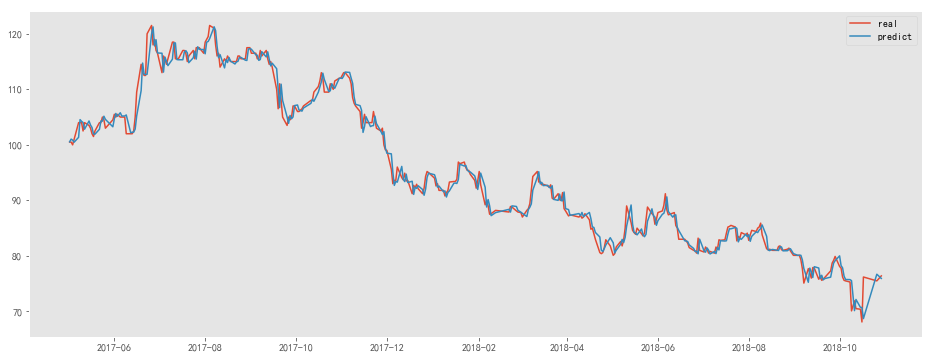

In [148]:
plt.figure(figsize=(16,6))
plt.plot(X_train.index, y_train.values, label='real')
plt.plot(X_train.index, regr.predict(X_train_std), label='predict')
plt.grid()
plt.legend()

### 預測單日收盤價

In [149]:
print('2018/2/26 收盤價')
print('實際值', y_test.values)
print('預測值', regr.predict(X_test_std))
print('誤差百分比 =', (regr.predict(X_test_std)[0][0] - y_test.values[0][0])/y_test.values[0][0] * 100, '%')

2018/2/26 收盤價
實際值 [[78.8]]
預測值 [[76.50276216]]
誤差百分比 = -2.9152764503274238 %


## 製作明日漲跌價差

In [150]:
#製作明日漲跌價差
df_all2 = df_all.copy()
date_list = list(df_all2.index)
for i in range(len(df_all2)-1):
    df_all2.loc[date_list[i],'明日漲跌價差'] = df_all2.loc[date_list[i+1], '漲跌價差']
df_all2

,殖利率(%),本益比,股價淨值比,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,明日收盤價,明日漲跌價差
日期,,,,,,,,,,,,,
2017-05-02,5.00,11.66,1.61,146011742,1.460074e+10,99.8,100.5,99.8,100.0,1.2,25883.0,100.5,0.5
2017-05-03,4.98,11.71,1.61,43599757,4.389370e+09,100.0,101.5,100.0,100.5,0.5,20474.0,100.5,0.0
2017-05-04,4.98,11.71,1.61,27758737,2.793178e+09,100.5,101.0,100.0,100.5,0.0,15032.0,100.0,-0.5
2017-05-05,5.00,11.66,1.61,22247391,2.231793e+09,100.0,101.0,100.0,100.0,-0.5,11274.0,101.0,1.0
2017-05-08,4.95,11.77,1.62,23208376,2.337152e+09,101.0,101.5,100.0,101.0,1.0,10786.0,104.0,3.0
2017-05-09,4.81,12.12,1.67,106299570,1.108934e+10,102.0,105.5,101.5,104.0,3.0,41750.0,104.0,0.0
2017-05-10,4.81,12.12,1.67,44982960,4.687034e+09,105.5,105.5,103.0,104.0,0.0,22963.0,104.0,0.0
2017-05-11,4.81,12.12,1.67,39791573,4.119467e+09,104.0,104.0,103.0,104.0,0.0,17492.0,102.5,-1.5
2017-05-12,4.39,11.95,1.65,59017991,6.092377e+09,104.0,105.0,102.0,102.5,-1.5,24904.0,104.0,1.5


In [151]:
df_all2 = df_all2.dropna()
X = df_all2[['開盤價','最高價','最低價','收盤價','漲跌價差','殖利率(%)','本益比','股價淨值比']]
y = df_all2[['明日漲跌價差']]

### 切分資料

In [152]:
#切分資料
X_train = X[:-1]
X_test = X[-1:]
y_train = y[:-1]
y_test = y[-1:]

### 標準化

In [153]:
#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 訓練

In [154]:
#訓練資料
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
regr.score(X_train_std, y_train)

0.024768582395284452

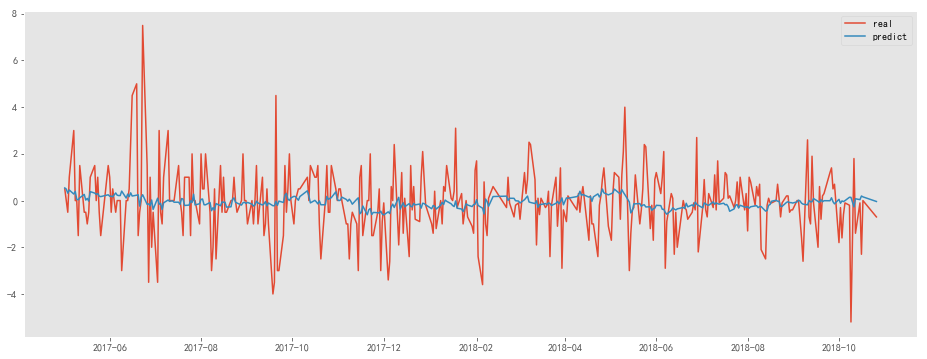

In [156]:
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.figure(figsize=(16,6))
plt.plot(X_train.index, y_train.values,label='real')
plt.plot(X_train.index, regr.predict(X_train_std), label='predict')
plt.grid()
plt.legend()

### 預測單日漲跌價差

In [157]:
print('2018/2/26 漲跌價差')
print('實際值', y_test.values)
print('預測值', regr.predict(X_test_std))
print('誤差百分比 =', (regr.predict(X_test_std)[0][0] - y_test.values[0][0])/y_test.values[0][0] * 100, '%')

2018/2/26 漲跌價差
實際值 [[0.9]]
預測值 [[0.07435226]]
誤差百分比 = -91.73863783351027 %
